In [5]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score



import seaborn as sns



In [6]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
# 2: Check for Missing Values
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [5]:
# 3: Encode Categorical Variables
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4: Feature Scaling
X = df_encoded.drop(['G3'], axis=1)
y_reg = df_encoded['G3']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5: Classification Target
y_cls = np.where(df_encoded['G3'] >= 10, 1, 0)

# 6: Train/Test Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_scaled, y_cls, test_size=0.2, random_state=42)

# Split train into train/val for Random Search
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_train_reg, y_train_reg, test_size=0.2, random_state=42)
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X_train_cls, y_train_cls, test_size=0.2, random_state=42)

In [6]:
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_pred_lr = lr.predict(X_test_reg)

print("Linear Regression Metrics:")
print("MSE:", mean_squared_error(y_test_reg, y_pred_lr))
print("MAE:", mean_absolute_error(y_test_reg, y_pred_lr))
print("R^2:", r2_score(y_test_reg, y_pred_lr))

Linear Regression Metrics:
MSE: 5.656642833231218
MAE: 1.6466656197147493
R^2: 0.7241341236974024


In [7]:
def build_dnn_regression(hidden1, hidden2, optimizer):
    model = Sequential()
    model.add(Dense(hidden1, activation='relu', input_shape=(X_train_reg.shape[1],)))
    model.add(Dense(hidden2, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

def random_search_dnn_regression(num_trials=5):
    results = []
    for _ in range(num_trials):
        cfg = {
            'hidden1': random.choice([32, 64, 128]),
            'hidden2': random.choice([16, 32, 64]),
            'optimizer': random.choice(['adam', 'rmsprop'])
        }
        model = build_dnn_regression(**cfg)
        history = model.fit(X_train_r, y_train_r, validation_data=(X_val_r, y_val_r),
                            epochs=100, batch_size=32, verbose=0)
        val_mae = history.history['val_mae'][-1]
        results.append((cfg, val_mae))

        plt.figure(figsize=(8, 4))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f"DNN Regression - Config: {cfg}")
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    for cfg, mae in results:
        print(f"Config: {cfg} -> Val MAE: {mae:.4f}")




The code creates and trains a deep neural network (DNN) for a regression issue using Keras. The build_dnn_regression function creates a simple feedforward neural network with two hidden layers whose sizes and the optimizer are input arguments from the user. The network incorporates ReLU activation on the hidden layers and outputs a single value with linear activation (default) for regression. It is trained with Mean Squared Error (MSE) as loss and Mean Absolute Error (MAE) as a performance measure. The random_search_dnn_regression function performs random search over a list of potential hyperparameters (number of neurons in each hidden layer and type of optimizer) over a specified number of trials. In each trial, the model is trained silently for 100 epochs, and the final validation MAE is recorded. A training loss and validation loss plot is also provided for each configuration. After all trials are complete, the function displays all configurations with their corresponding validation MAE, so it is easier to visualize which set of parameters is best.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


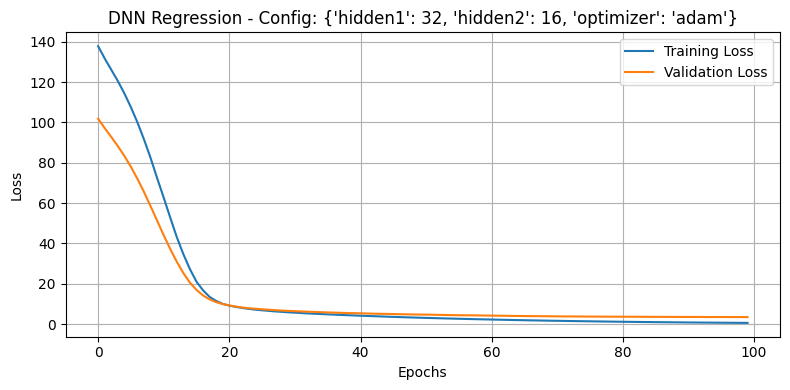

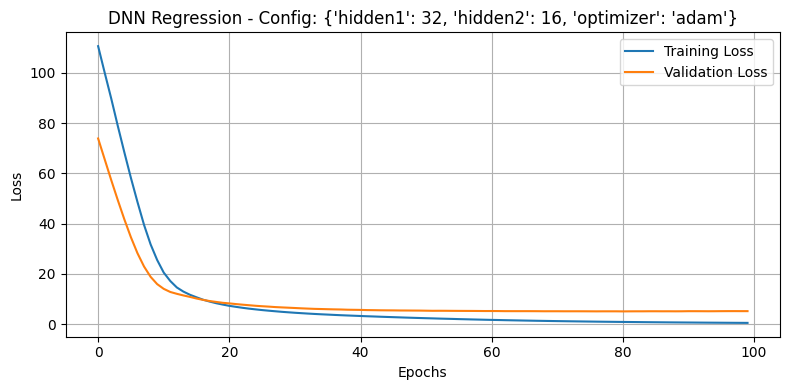

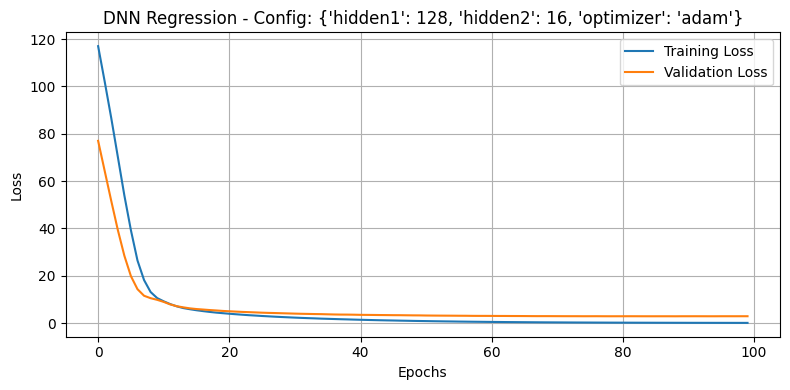

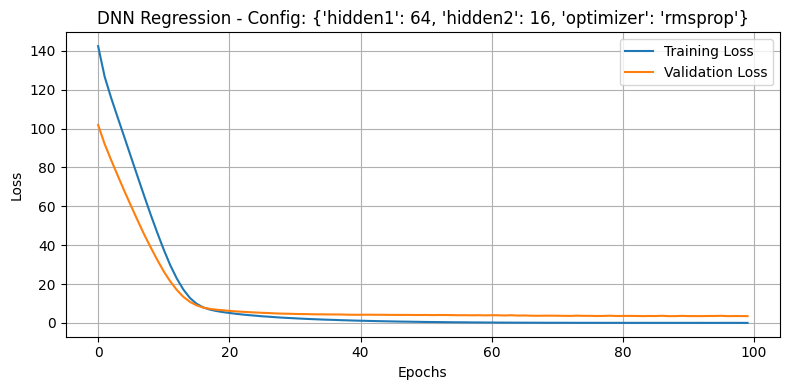

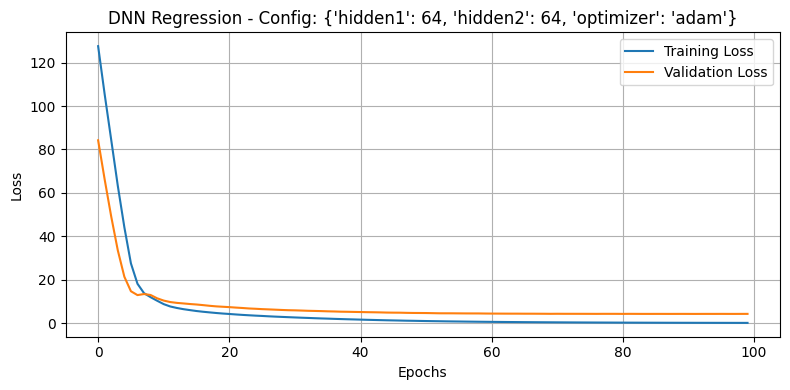

Config: {'hidden1': 32, 'hidden2': 16, 'optimizer': 'adam'} -> Val MAE: 1.4898
Config: {'hidden1': 32, 'hidden2': 16, 'optimizer': 'adam'} -> Val MAE: 1.8238
Config: {'hidden1': 128, 'hidden2': 16, 'optimizer': 'adam'} -> Val MAE: 1.3197
Config: {'hidden1': 64, 'hidden2': 16, 'optimizer': 'rmsprop'} -> Val MAE: 1.4390
Config: {'hidden1': 64, 'hidden2': 64, 'optimizer': 'adam'} -> Val MAE: 1.6905


In [8]:
random_search_dnn_regression(num_trials=5)

In [9]:
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']}
grid_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring='accuracy', cv=5)
grid_logreg.fit(X_scaled, y_cls)

print("Best Logistic Regression Params:", grid_logreg.best_params_)
print("Best CV Accuracy:", grid_logreg.best_score_)

Best Logistic Regression Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Accuracy: 0.9063291139240507


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_logreg = grid_logreg.predict(X_test_cls)
print("\nLogistic Regression Classification Metrics:")
print("Accuracy:", accuracy_score(y_test_cls, y_pred_logreg))
print("Precision:", precision_score(y_test_cls, y_pred_logreg))
print("Recall:", recall_score(y_test_cls, y_pred_logreg))
print("F1 Score:", f1_score(y_test_cls, y_pred_logreg))



Logistic Regression Classification Metrics:
Accuracy: 0.9367088607594937
Precision: 0.9433962264150944
Recall: 0.9615384615384616
F1 Score: 0.9523809523809523


This code performs hyperparameter optimization of logistic regression with GridSearchCV over 5-fold cross-validation. It identifies the best combination of C (regularization strength) and the solver method for maximum accuracy. When fitted, it outputs the best parameters and the highest cross-validated accuracy attained.

In [7]:
def build_dnn_classifier(hidden1, hidden2, optimizer, dropout_rate=None):
    model = Sequential()
    model.add(Dense(hidden1, activation='relu', input_shape=(X_train_cls.shape[1],)))
    if dropout_rate:
        model.add(Dropout(dropout_rate))
    model.add(Dense(hidden2, activation='relu'))
    if dropout_rate:
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    opt = Adam() if optimizer == 'adam' else RMSprop()
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def random_search_dnn_classifier(num_trials=5):
    results = []
    for _ in range(num_trials):
        cfg = {
            'hidden1': random.choice([32, 64, 128]),
            'hidden2': random.choice([32, 64]),
            'optimizer': random.choice(['adam', 'rmsprop']),
            'dropout_rate': random.choice([None, 0.2, 0.3])
        }
        model = build_dnn_classifier(**cfg)
        history = model.fit(X_train_c, y_train_c, validation_data=(X_val_c, y_val_c),
                            epochs=100, batch_size=32, verbose=0)
        val_acc = history.history['val_accuracy'][-1]
        results.append((cfg, val_acc))

        plt.figure(figsize=(8, 4))
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f"DNN Classification - Config: {cfg}")
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    for cfg, acc in results:
        print(f"Config: {cfg} -> Val Accuracy: {acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


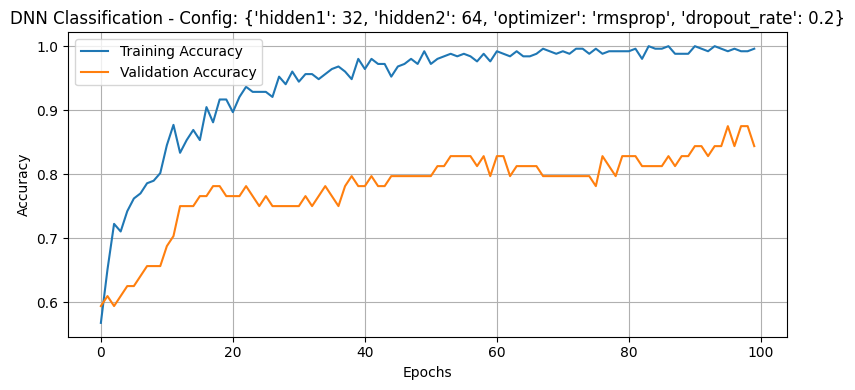

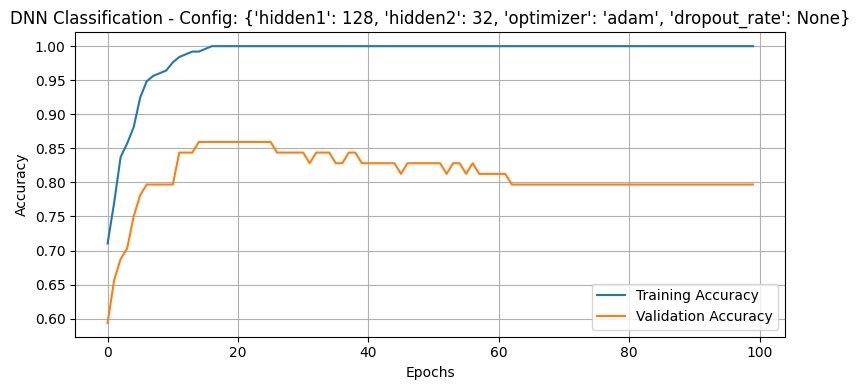

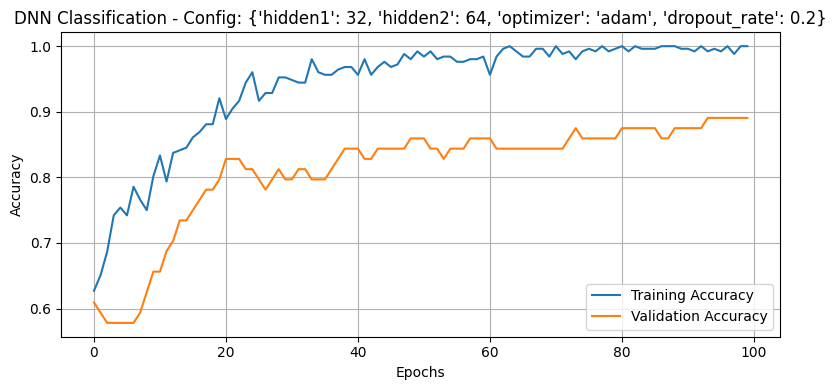

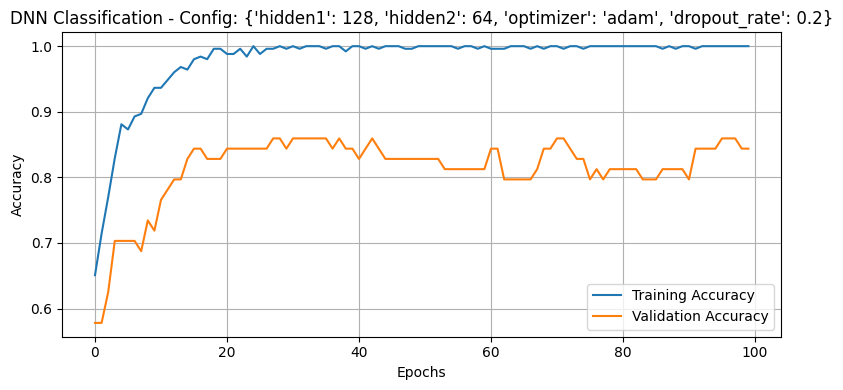

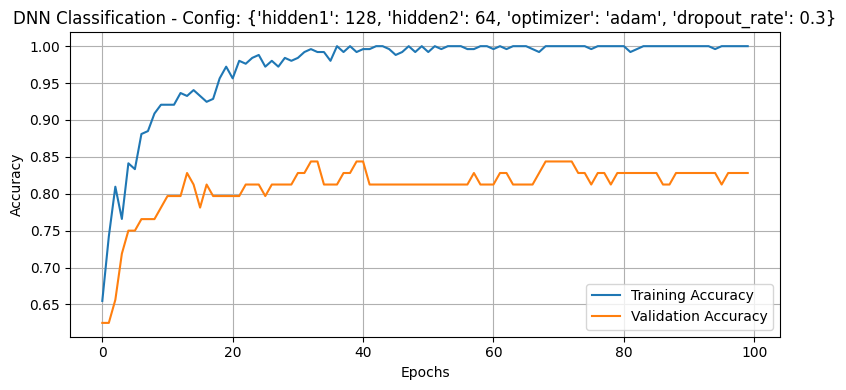

Config: {'hidden1': 32, 'hidden2': 64, 'optimizer': 'rmsprop', 'dropout_rate': 0.2} -> Val Accuracy: 0.8438
Config: {'hidden1': 128, 'hidden2': 32, 'optimizer': 'adam', 'dropout_rate': None} -> Val Accuracy: 0.7969
Config: {'hidden1': 32, 'hidden2': 64, 'optimizer': 'adam', 'dropout_rate': 0.2} -> Val Accuracy: 0.8906
Config: {'hidden1': 128, 'hidden2': 64, 'optimizer': 'adam', 'dropout_rate': 0.2} -> Val Accuracy: 0.8438
Config: {'hidden1': 128, 'hidden2': 64, 'optimizer': 'adam', 'dropout_rate': 0.3} -> Val Accuracy: 0.8281


In [11]:
random_search_dnn_classifier(num_trials=5)

In [6]:
CV = KFold(n_splits=5, shuffle=True, random_state=42)

lr_scores = cross_val_score(LinearRegression(), X_scaled, y_reg, scoring='r2', cv=CV)
logreg_scores = cross_val_score(LogisticRegression(max_iter=1000), X_scaled, y_cls, scoring='accuracy', cv=CV)

print("Linear Regression R2 CV:", lr_scores.mean(), "+/-", lr_scores.std())
print("Logistic Regression Accuracy CV:", logreg_scores.mean(), "+/-", logreg_scores.std())

Linear Regression R2 CV: 0.7916292006363468 +/- 0.04219703020079145
Logistic Regression Accuracy CV: 0.9139240506329115 +/- 0.014761903531253924


this code performs 5-fold cross-validation for linear regression and logistic regression models using KFold. It checks the linear regression model using R² score and the logistic regression model using accuracy. It then prints the mean and standard deviation of the cross-validation scores for both models to check their performance and stability.